In [17]:
import numpy as np 
import pandas as pd
import scipy 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Missing Value Imputation:
* Missing values/or null values are basically void values, which could have been entered because of any human error or some technical glitch in the dataset, and thus we need to trat them before moving into preprocessing stage as this may hinder our process of making the most efficient model

In [2]:
# As we have to repeat the feature engineering process in this file

In [3]:
sales=pd.read_csv('https://datahack-prod.s3.amazonaws.com/train_file/train_v9rqX0R.csv')

In [4]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
sales.Item_Fat_Content.replace(to_replace=['LF','low fat','reg'],value=['Low Fat','Low Fat','Regular'],inplace=True)

In [6]:
sales['Id_Item_Cat']=sales.Item_Identifier.str[0:2]

In [7]:
sales.loc[sales.Id_Item_Cat=='NC','Item_Fat_Content']='Non Edible'

In [8]:
perish=['Dairy', 'Meat', 'Fruits and Vegetables','Breakfast',  
       'Breads', 'Starchy Foods',  'Seafood']

In [9]:
def perished(x):
    if x in perish:
        return('Perishable')
    else:
        return('Non Perishable')

In [10]:
sales['Item_cat']=sales.Item_Type.apply(perished)

In [11]:
lowes =["OUT010", "OUT019"]
high =["OUT013", "OUT027"]


def outlets(x):
    if x in lowes:
        return("Low_performers")
    elif x in high:
        return("high_performers")
    else: 
        return("Avg_performers") 
    
    
sales["Out_Cat"]=sales.Outlet_Identifier.apply(outlets)

In [12]:
sales['vintage']=2013-sales.Outlet_Establishment_Year

In [13]:
# From Here Missing Values Imputation is started

In [14]:
sales.isnull().sum() # Checking the count of missing values in data

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Id_Item_Cat                     0
Item_cat                        0
Out_Cat                         0
vintage                         0
dtype: int64

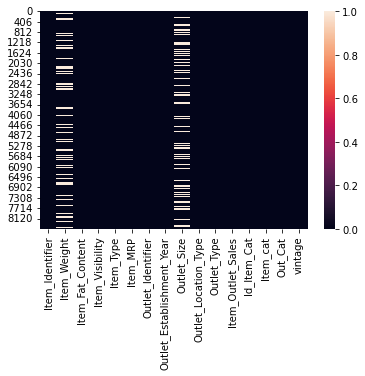

In [18]:
sns.heatmap(sales.isnull())
plt.show() # Checking the vissing value by visual means 

# Item Weight

In [19]:
sales.loc[sales.Item_Identifier=='FDA15'] # Item weight has the missing values and it is dependent on Item identifier

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers,14
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,FD,Perishable,Avg_performers,11
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,FD,Perishable,Avg_performers,9
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,FD,Perishable,Avg_performers,4
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,FD,Perishable,Low_performers,15
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392,FD,Perishable,high_performers,26
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392,FD,Perishable,high_performers,28
7543,FDA15,9.3,Low Fat,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208,FD,Perishable,Avg_performers,6


In [20]:
# # so we will take the Item Identifier to replace the missing value 

In [21]:
# There are two functions in fillna()
# 1.fflill() # forward row filling
# 2.bfill()  # backward row filling 

In [24]:
sales['Item_Weight']=sales.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [25]:
sales.loc[sales.Item_Weight.isnull()] # These are the single entries so the mean is not there 
# so the fill na method did not work 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,FD,Non Perishable,high_performers,28
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,FD,Non Perishable,high_performers,28
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,FD,Perishable,high_performers,28
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,FD,Non Perishable,Low_performers,28


In [26]:
print(sales.loc[sales.Item_Type=='Frozen Foods','Item_Weight'].mean())
print(sales.loc[sales.Item_Type=='Snack Foods','Item_Weight'].mean())
print(sales.loc[sales.Item_Type=='Dairy','Item_Weight'].mean())
print(sales.loc[sales.Item_Type=='Baking Goods','Item_Weight'].mean())

12.782403508771965
13.031230191826587
13.37990455212926
12.28531684698612


In [27]:
# Printed the mean for the Item Type to fill the missing values manually

In [28]:
sales.loc[(sales.Item_Type=='Frozen Foods')&(sales.Item_Weight.isnull()),'Item_Weight']=12.7824


In [29]:
sales.loc[(sales.Item_Type=='Snack Foods')&(sales.Item_Weight.isnull()),'Item_Weight']=13.0312

In [30]:
sales.loc[(sales.Item_Type=='Dairy')&(sales.Item_Weight.isnull()),'Item_Weight']=13.3799

In [31]:
sales.loc[(sales.Item_Type=='Baking Goods')&(sales.Item_Weight.isnull()),'Item_Weight']=12.2853

# Outlet Size

In [32]:
sales.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [33]:
sales.loc[sales.Outlet_Size.isnull(),['Outlet_Location_Type','Outlet_Type']].value_counts()

Outlet_Location_Type  Outlet_Type      
Tier 2                Supermarket Type1    1855
Tier 3                Grocery Store         555
dtype: int64

In [35]:
# By groupping by these columns we have got to know that
# Mostly the size of the outlet is medium 
# so we will fill the values with medium in outlet size

In [36]:
sales.loc[sales.Outlet_Size.isnull(),'Outlet_Size']='Medium'

In [37]:
sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Id_Item_Cat                  0
Item_cat                     0
Out_Cat                      0
vintage                      0
dtype: int64

In [38]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,Avg_performers,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,Avg_performers,14
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,Perishable,Low_performers,15
4,NCD19,8.930,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,high_performers,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FD,Non Perishable,high_performers,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,FD,Non Perishable,Avg_performers,11
8520,NCJ29,10.600,Non Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NC,Non Perishable,Avg_performers,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FD,Non Perishable,Avg_performers,4
